<a href="https://colab.research.google.com/github/june-oh/2023_AI_Academy_ASR/blob/main/5_whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Whisper

- https://openai.com/blog/whisper/  
- trained on 680,000 hours of multilingual and multitask supervised data collected from the web.
- multiple languages (https://github.com/openai/whisper/blob/main/whisper/tokenizer.py)

<img src="https://cdn.openai.com/whisper/asr-summary-of-model-architecture-desktop.svg">

## Whisper install
https://github.com/openai/whisper

In [2]:
# clone git repo
!pip install git+https://github.com/openai/whisper.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-z38jd03j
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-z38jd03j
  Resolved https://github.com/openai/whisper.git to commit 7858aa9c08d98f75575035ecd6481f462d66ca27
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230124-py3-none-any.whl size=1179424 sha256=95d0909684967ee5710ef5d002d122809a5cdf134d9d3dd8b15bc7de8067eaf5
  Stored in directory: /tmp/pip-ephem-wheel-cache-k33vb69y/wheels/a7/70/18/b7693c07b1d18b3dafb328f5d0496aa0d41a9c09ef332fd8e6
Successfully built opena

## Whisper model load

In [3]:
# whisper model load
import whisper

model = whisper.load_model("large")

100%|█████████████████████████████████████| 2.87G/2.87G [00:40<00:00, 75.5MiB/s]


In [4]:
# whisper modules

tiny_model = whisper.load_model("tiny")

100%|██████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 117MiB/s]


In [7]:
list(tiny_model.parameters())

[Parameter containing:
 tensor([[[-7.5645e-03, -7.5073e-03, -7.2098e-03],
          [ 2.4460e-02,  1.7090e-02,  1.2566e-02],
          [ 1.7639e-02,  1.3382e-02,  7.1297e-03],
          ...,
          [-4.5654e-02, -2.0615e-02, -1.8799e-02],
          [-5.6152e-02, -3.0167e-02, -2.2278e-02],
          [-9.1309e-02, -7.4463e-02, -6.0150e-02]],
 
         [[ 1.9836e-03,  4.9531e-05,  8.9417e-03],
          [ 3.6182e-03, -4.6921e-03,  7.0953e-03],
          [ 1.3229e-02,  2.4738e-03,  1.4656e-02],
          ...,
          [ 1.0986e-02,  1.0757e-02, -6.6795e-03],
          [ 7.4883e-03,  4.8370e-03, -1.3214e-02],
          [ 2.4628e-02,  2.2186e-02,  2.5005e-03]],
 
         [[ 2.1042e-02,  2.7985e-02,  3.2715e-02],
          [-6.1737e-02, -7.9346e-02, -9.3628e-02],
          [-2.3315e-02, -5.3467e-02, -5.6549e-02],
          ...,
          [-9.7942e-04, -8.1940e-03, -2.5139e-03],
          [ 2.8801e-03, -4.2114e-03, -3.9139e-03],
          [-9.0561e-03, -1.6479e-02, -7.9575e-03]],
 
     

- `datasets` : audio, computer vision, nlp task 용 공유 데이터에 쉽게 접근할 수 있는 라이브러리, huggingface에서 사용됨

In [8]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [9]:
from datasets import load_dataset

## LibriSpeech dataset

- approximately 1000 hours of 16kHz
- read audiobooks from the LibriVox project

https://www.openslr.org/12  
https://paperswithcode.com/dataset/librispeech  
https://huggingface.co/datasets/librispeech_asr

In [10]:
# LibriSpeech dataset load
ds = load_dataset("librispeech_asr", "clean")

KeyboardInterrupt: ignored

In [11]:
# LibriSpeech test data load
english_ds = load_dataset("kresnik/librispeech_asr_test", "clean")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset librispeech_asr_test downloaded and prepared to /root/.cache/huggingface/datasets/kresnik___librispeech_asr_test/clean/2.1.0/16bc288fa237b20821c5b51c8c09426b2689d8c5a889287589cb12aba6705e74. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# check file list
english_ds = english_ds['test']

In [15]:
len(english_ds)

2620

In [16]:
# check sample data
sample = english_ds[0]

In [17]:
sample

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/c94eb421fb50cd9d1b68fa05e36adc06bf44c82dbf4bf576772bd123c9cf2781/LibriSpeech/test-clean/61/70968/61-70968-0000.flac',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/c94eb421fb50cd9d1b68fa05e36adc06bf44c82dbf4bf576772bd123c9cf2781/LibriSpeech/test-clean/61/70968/61-70968-0000.flac',
  'array': array([-9.3078613e-03, -9.6130371e-03, -9.0637207e-03, ...,
          4.1198730e-03,  2.3803711e-03, -6.1035156e-05], dtype=float32),
  'sampling_rate': 16000},
 'text': 'HE BEGAN A CONFUSED COMPLAINT AGAINST THE WIZARD WHO HAD VANISHED BEHIND THE CURTAIN ON THE LEFT',
 'speaker_id': 61,
 'chapter_id': 70968,
 'id': '61-70968-0000'}

- `IPython.display` : IPython 위젯을 사용할 수 있는 라이브러리

In [18]:
import IPython.display as ipd

In [20]:
# listen audio file using ipd.Audio
ipd.Audio(sample['file'])

In [21]:
sample['text']

'HE BEGAN A CONFUSED COMPLAINT AGAINST THE WIZARD WHO HAD VANISHED BEHIND THE CURTAIN ON THE LEFT'

## whisper model을 이용한 LibriSpeech 인식

In [22]:
# transcribe using whisper model
result = model.transcribe(sample['file'], languages="ko")

In [24]:
from pprint import pprint

In [25]:
pprint(result)

{'language': 'en',
 'segments': [{'avg_logprob': -0.3016481002171834,
               'compression_ratio': 1.1395348837209303,
               'end': 3.96,
               'id': 0,
               'no_speech_prob': 0.004000591579824686,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' He began a confused complaint against the wizard, who '
                       'had vanished behind the curtain',
               'tokens': [634,
                          4283,
                          257,
                          9019,
                          20100,
                          1970,
                          264,
                          25807,
                          11,
                          567,
                          632,
                          37518,
                          2261,
                          264,
                          26789]},
              {'avg_logprob': -0.7105002403259277,
         

In [27]:
# check result
print("hypothesis: "+ result['text'])
print("reference: "+ sample['text'].lower())

hypothesis:  He began a confused complaint against the wizard, who had vanished behind the curtain on the left.
reference: he began a confused complaint against the wizard who had vanished behind the curtain on the left


In [ ]:
# compare with reference

- `jiwer` : CER, WER 등 음성인식 결과 평가 관련 라이브러리

In [28]:
! pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.2 MB/s eta 0:00:00


In [29]:
from jiwer import cer

In [32]:
# calculate cer
cer(sample['text'].lower(), result['text'].lower())

0.020833333333333332

## Zeroth-Korean

- 51.6시간 한국어 학습데이터 (22,263 발화, 105명, 3000 문장)  
- 휴대폰으로 녹음
- https://github.com/goodatlas/zeroth

In [33]:
# Zeroth-Korean dataset load
korea_ds = load_dataset("kresnik/zeroth_korean", "clean")

Computing checksums: 100%|##########| 1/1 [01:04<00:00, 64.63s/it]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset zeroth_korean downloaded and prepared to /root/.cache/huggingface/datasets/kresnik___zeroth_korean/clean/1.0.1/e5d146fc495c84b4b1471118f43a266048059e6a0ccd6c0e23b34322b1d6d379. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [61]:
# check file list
korea_ds

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
        num_rows: 22263
    })
    test: Dataset({
        features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
        num_rows: 457
    })
})

In [62]:
ko_test_ds = korea_ds['test']

In [63]:
len(ko_test_ds)

457

In [64]:
# check sample data
sample = ko_test_ds[0]
pprint(sample)

{'audio': {'array': array([ 0.0000000e+00,  0.0000000e+00,  3.0517578e-05, ...,
       -1.2207031e-04,  1.8310547e-04, -1.2207031e-04], dtype=float32),
           'path': '/root/.cache/huggingface/datasets/downloads/extracted/3c93119fdbcba519e1529c416a7339ed19b67c18686fc5bea5eda3309e01e58e/test_data_01/003/126/126_003_0095.flac',
           'sampling_rate': 16000},
 'chapter_id': 3,
 'file': '/root/.cache/huggingface/datasets/downloads/extracted/3c93119fdbcba519e1529c416a7339ed19b67c18686fc5bea5eda3309e01e58e/test_data_01/003/126/126_003_0095.flac',
 'id': '126_003_0095',
 'speaker_id': 126,
 'text': '지역별로 균형 있게 인력을 채용하고 각 지점에 배치해 지역 밀착형 영업을 강화한다는 윤종규 국민은행장의 인사 철학을 반영해 '
         '지방 방문 면접을 진행하는 점도 두드러진다'}


In [65]:
ipd.Audio(sample['file'])

In [ ]:
# listen audio file using ipd.Audio

## whisper model을 이용한 Zeroth-Korean 인식

In [66]:
# transcribe using whisper model
ko_result = model.transcribe(sample['file'])

In [69]:
# check result
pprint(ko_result)

{'language': 'ko',
 'segments': [{'avg_logprob': -0.172759448780733,
               'compression_ratio': 1.2596685082872927,
               'end': 15.0,
               'id': 0,
               'no_speech_prob': 0.007648051250725985,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' 지역별로 균형있게 인력을 채용하고 각 지점의 배치에 지역 밀착형 영업을 강화한다는 용종규 '
                       '국민은행의 인사철학을 반영해 지방 방문 면접을 진행하는 점도 두드러진다.',
               'tokens': [50364,
                          36209,
                          10708,
                          14046,
                          1510,
                          254,
                          17453,
                          8425,
                          1810,
                          34339,
                          11770,
                          1638,
                          27411,
                          8761,
                          7040,
                          28378,
              

In [70]:
# compare with reference
print("hypothesis: " + ko_result['text'])
print("reference: " + sample['text'])

hypothesis:  지역별로 균형있게 인력을 채용하고 각 지점의 배치에 지역 밀착형 영업을 강화한다는 용종규 국민은행의 인사철학을 반영해 지방 방문 면접을 진행하는 점도 두드러진다.
reference: 지역별로 균형 있게 인력을 채용하고 각 지점에 배치해 지역 밀착형 영업을 강화한다는 윤종규 국민은행장의 인사 철학을 반영해 지방 방문 면접을 진행하는 점도 두드러진다


In [71]:
# calculate cer
cer(sample['text'], ko_result['text'])

0.07608695652173914

In [72]:
import re
# re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', text)

In [75]:
ref = ko_result['text'].lstrip()
ref = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', ref)

In [76]:
print(ref)

지역별로 균형있게 인력을 채용하고 각 지점의 배치에 지역 밀착형 영업을 강화한다는 용종규 국민은행의 인사철학을 반영해 지방 방문 면접을 진행하는 점도 두드러진다


In [77]:
cer(sample['text'], ref)

0.06521739130434782

In [ ]:
# remove special symbol

In [ ]:
# calculate cer

In [36]:
# whisper load_audio
# whisper pad_or_trim

audio = whisper.load_audio(sample['file'])
audio.shape

(78480,)

In [38]:
audio = whisper.pad_or_trim(audio)
audio.shape

(480000,)

In [39]:
480000/16000

30.0

In [37]:
78480/16000

4.905

In [47]:
# whisper log_mel_spectrogram
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [48]:
mel

tensor([[ 0.7133,  0.5256,  0.5749,  ..., -0.9601, -0.9601, -0.9601],
        [ 0.4420,  0.5337,  0.5324,  ..., -0.9601, -0.9601, -0.9601],
        [ 0.3206,  0.3736,  0.3519,  ..., -0.9601, -0.9601, -0.9601],
        ...,
        [-0.5166, -0.6154, -0.6449,  ..., -0.9601, -0.9601, -0.9601],
        [-0.6501, -0.6428, -0.6622,  ..., -0.9601, -0.9601, -0.9601],
        [-0.5554, -0.6369, -0.6443,  ..., -0.9601, -0.9601, -0.9601]],
       device='cuda:0')

In [41]:
mel.shape

torch.Size([80, 3000])

- `matplotlib` : 시각화용 라이브러리 

In [43]:
import matplotlib.pyplot as plt

In [50]:
mel_cpu = mel.cpu()

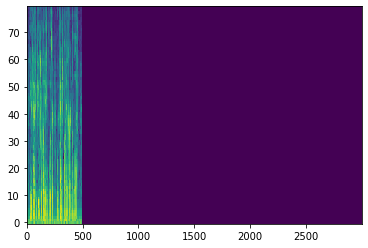

In [52]:
plt.imshow(mel_cpu,aspect='auto',interpolation='nearest',origin='lower')

In [53]:
# whisper decode
# options = whisper.DecodingOptions(fp16 = False)
result = whisper.decode(model, mel)

In [57]:
sample['text'].lower()

'he began a confused complaint against the wizard who had vanished behind the curtain on the left'

In [55]:
pprint(result)

DecodingResult(audio_features=tensor([[-1.2832e+00, -1.5000e+00, -1.0137e+00,  ..., -3.0742e+00,
         -1.0977e+00,  1.1803e-02],
        [-8.1494e-01, -4.8853e-01, -4.9146e-01,  ..., -3.0176e+00,
          7.0117e-01, -3.3789e-01],
        [-1.0527e+00,  1.0703e+00, -1.1469e-01,  ..., -1.6826e+00,
          7.2607e-01, -1.0723e+00],
        ...,
        [ 2.9373e-03, -5.0735e-03, -1.1688e-02,  ...,  4.2229e-03,
         -6.5880e-03, -1.1086e-02],
        [ 5.7745e-04, -1.7548e-03, -1.4145e-02,  ...,  4.8370e-03,
         -6.4049e-03, -1.0948e-02],
        [-3.4866e-03,  4.0398e-03, -1.3008e-02,  ...,  3.6011e-03,
         -1.7042e-03, -1.0704e-02]], device='cuda:0', dtype=torch.float16), language='en', language_probs=None, tokens=[50364, 634, 4283, 257, 9019, 20100, 1970, 264, 25807, 11, 567, 632, 37518, 2261, 264, 26789, 50562, 50562, 322, 264, 1411, 13, 50598], text='He began a confused complaint against the wizard, who had vanished behind the curtain on the left.', avg_logprob=-

In [59]:
whisper_result = model.transcribe(sample['file'])

In [60]:
pprint(whisper_result)

{'language': 'en',
 'segments': [{'avg_logprob': -0.3016481002171834,
               'compression_ratio': 1.1395348837209303,
               'end': 3.96,
               'id': 0,
               'no_speech_prob': 0.004000591579824686,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' He began a confused complaint against the wizard, who '
                       'had vanished behind the curtain',
               'tokens': [634,
                          4283,
                          257,
                          9019,
                          20100,
                          1970,
                          264,
                          25807,
                          11,
                          567,
                          632,
                          37518,
                          2261,
                          264,
                          26789]},
              {'avg_logprob': -0.7105002403259277,
         

In [82]:
from jiwer import wer

In [83]:
wer(sample['text'], ref)

0.34782608695652173

## 실시간으로 녹음 후 Whisper Model로 인식 결과 확인
Gradio를 이용해 간단한 Web UI를 구현해 본인의 목소리를 실시간으로 녹음하고  
whisper model로 녹음한 음성 인식 결과 확인  
https://github.com/innovatorved/whisper-openai-gradio-implementation

In [78]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [79]:
import gradio as gr 
import time

In [80]:
def SpeechToText(audio):
    if audio == None : return "" 
    time.sleep(1)

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # Detect the Max probability of language
    _, probs = model.detect_language(mel)
    language = max(probs, key=probs.get)

    #  Decode audio to Text
    options = whisper.DecodingOptions(fp16 = False)
    result = whisper.decode(model, mel)
    return (language , result.text)

In [81]:
gr.Interface(
    title = 'OpenAI Whisper implementation on Gradio Web UI', 
    fn=SpeechToText, 
    
    inputs=[
        gr.Audio(source="microphone", type="filepath")
    ],
    outputs=[
        "label",
        "textbox",
    ],
    live=True
).launch(
    debug=False,
    share=True
)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://44a1e889-b7a6-40bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
